In [87]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from iminuit import Minuit
from scipy import stats
import matplotlib as mpl
sys.path.append('../External_Functions')
from ExternalFunctions import *
from scipy import special as spe
%matplotlib inline
#set mpl font
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

data_vp = np.loadtxt('data_VoltagePeaks.txt')

# I – Distributions and probabilities:
\
**1.1.1**\
\
The probability of $N_3$ follows binomial distribution since every roll is independent and the dice are normal dice.
\
\
**1.1.2**\
\
The probability of getting 7 or more 3s in one roll with 20 dice is calculated by $C_{20}^7 (\frac{1}{6})^{7} \approx 0.277$  

In [54]:
count = 0
N3 = 0
for i in range(10000):
    b = np.random.randint(1,7,20)
    count+=len(np.argwhere(b==3))
    if np.sum(b==3)>=7:
        N3 +=1
print(count/200000)
print(N3/10000)

p_match = 1/6

p_match_even = spe.comb(20, 7) * (p_match**7)
print(p_match_even)

0.1679
0.0392
0.27692043895747587


**1.2.1**\
\
The positive fraction of PCR is $\frac{2464}{103261}\approx 0.0239$, and the positive rate of AntiGen is $\frac{491}{26162}\approx 0.0188$


**1.3.1**


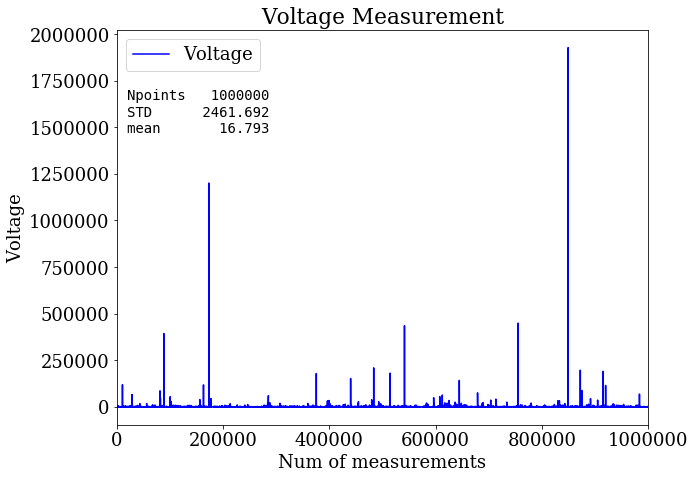

In [130]:
fig_v, ax_v = plt.subplots(figsize=(10,7))
ax_v.plot(np.linspace(0,len(data_vp),len(data_vp)), data_vp, label='Voltage', c='b')
ax_v.set_xlabel('Num of measurements')
ax_v.set_ylabel('Voltage')
plt.legend()
ax_v.set_title('Voltage Measurement')
ax_v.set_xlim(0, len(data_vp))
d = {'Npoints' : len(data_vp),
    'STD': np.std(data_vp),
     'mean':     np.average(data_vp),
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.85, text, ax_v, fontsize=14)
fig_v.tight_layout()

**1.3.2**\
\
In order to fit the peak in the diagram, first we need to seach all the peaks out, and then zoom in to see what the peaks looks like.

The peaks is 
 [ 10835  28804  81495  88668 163305 173214 375641 440218 483657 514504
 541575 612736 644727 679105 755368 849590 872460 875504 915527 920077
 983782]


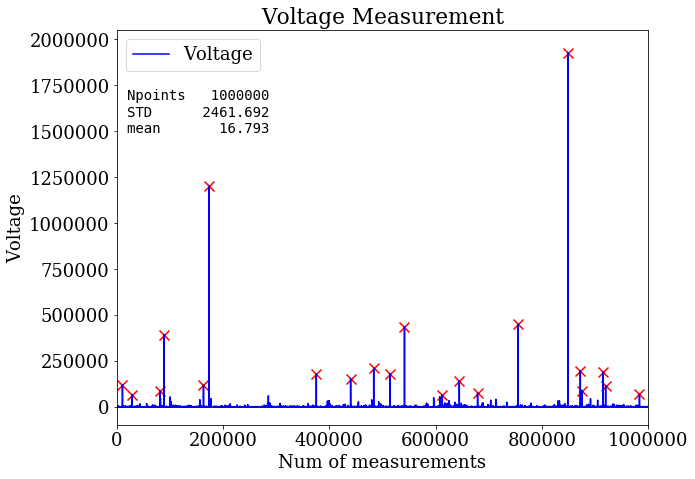

In [131]:
from scipy.signal import find_peaks
peak_vol = find_peaks(data_vp, distance=100, height=1000, prominence=60000)[0]
ax_v.scatter(np.linspace(0,len(data_vp),len(data_vp))[peak_vol], data_vp[peak_vol], marker='x', color='r', s=100)
print('The peaks is \n', peak_vol)
fig_v

Zoom in one peak to seek for the distribution. Notice that it follows a gaussian distribution

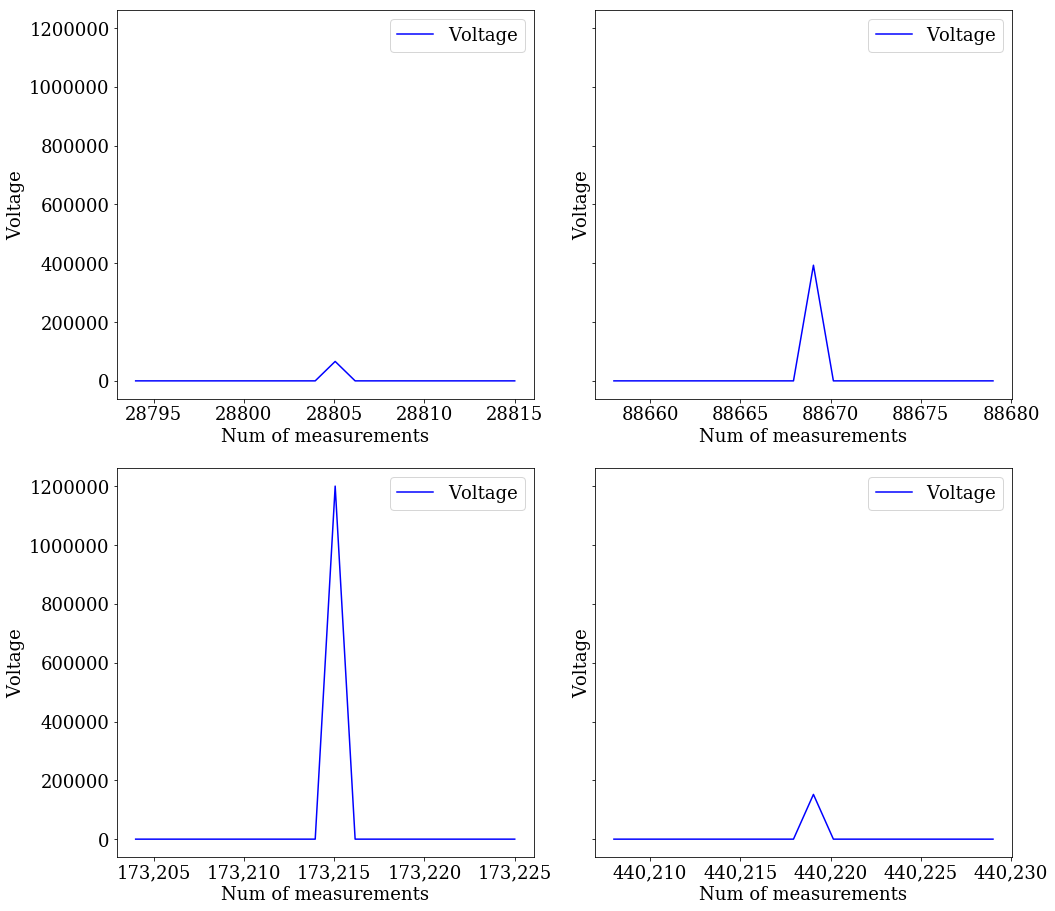

In [156]:
fig_p1,([ax_p1, ax_p2],[ax_p3, ax_p4]) = plt.subplots(2,2,figsize=(15,13),sharey=True)
ax_p1.plot(np.linspace(peak_vol[1]-10,peak_vol[1]+11, 20), data_vp[peak_vol[1]-10:peak_vol[1]+10], label='Voltage', c='b')
ax_p2.plot(np.linspace(peak_vol[3]-10,peak_vol[3]+11, 20), data_vp[peak_vol[3]-10:peak_vol[3]+10], label='Voltage', c='b')
ax_p3.plot(np.linspace(peak_vol[5]-10,peak_vol[5]+11, 20), data_vp[peak_vol[5]-10:peak_vol[5]+10], label='Voltage', c='b')
ax_p4.plot(np.linspace(peak_vol[7]-10,peak_vol[7]+11, 20), data_vp[peak_vol[7]-10:peak_vol[7]+10], label='Voltage', c='b')
ax_p1.set_xlabel('Num of measurements')
ax_p1.set_ylabel('Voltage')
ax_p2.set_xlabel('Num of measurements')
ax_p2.set_ylabel('Voltage')
ax_p3.set_xlabel('Num of measurements')
ax_p3.set_ylabel('Voltage')
ax_p4.set_xlabel('Num of measurements')
ax_p4.set_ylabel('Voltage')
ax_p3.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax_p4.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax_p1.legend()
ax_p2.legend()
ax_p3.legend()
ax_p4.legend()


fig_p1.tight_layout()

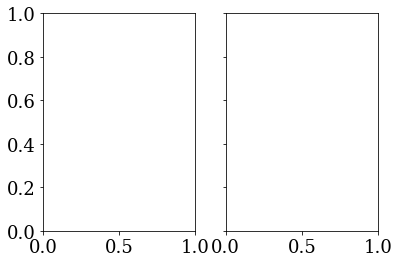

In [138]:
Nexp = len(peak_vol)
for vol_peak in peak_vol:
    fit_range = data_vp[vol_peak]
    
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# II – Error propagation:
\
2.1.1\
\
$x = 1.96 \pm 0.03$, therefore $\sigma_x=0.03$, $\sigma_y^2 = (\frac{\partial{y}}{\partial{x}})^2 \sigma_x^2$, $\sigma_z^2 = (\frac{\partial{y}}{\partial{x}})^2 \sigma_x^2$

In [185]:
def dydx(x):
    return -2*x/((1+x**2)**2)
def dzdx(x):
    return 2/((1-x)**(3))
mu_y = (1+1.96**2)**(-1)
mu_z = (1-1.96)**(-2)
sig_y = np.sqrt(dydx(1.96)**2 * 0.03**2)
sig_z = np.sqrt(dzdx(1.96)**2 * 0.03**2)
print('The value of y is %2.3f, and the uncertainty(sigma y) is %2.4f'% (mu_y,sig_y))
print('The value of z is %2.3f, and the uncertainty(sigma z) is %2.4f'% (mu_z,sig_z))

The value of y is 0.207, and the uncertainty(sigma y) is 0.0050
The value of z is 1.085, and the uncertainty(sigma z) is 0.0678


**2.1.2**

In [184]:
mu_y = (1+0.96**2)**(-1)
mu_z = (1-0.96)**(-2)
sig_y = np.sqrt(dydx(0.96)**2 * 0.03**2)
sig_z = np.sqrt(dzdx(0.96)**2 * 0.03**2)
print('when x = 0.96 +/- 0.03')
print('The value of y is %2.3f, and the uncertainty(sigma y) is %2.4f'% (mu_y,sig_y))
print('The value of z is %2.3f, and the uncertainty(sigma z) is %2.4f'% (mu_z,sig_z))

when x = 0.96 +/- 0.03
The value of y is 0.520, and the uncertainty(sigma y) is 0.0156
The value of z is 625.000, and the uncertainty(sigma z) is 937.5000


**2.2.1**\
\
Weighted mean is $\frac{\sum{x_i/\sigma^2}}{\sum 1/\sigma^2}$, and the related SD is $\sqrt{\frac{1}{\sum 1/\sigma^2}}$ 

In [232]:
g_result = np.array([9.54, 9.36, 10.02, 9.87, 9.98, 9.86, 9.86, 9.81, 9.79])
g_unc = np.array([0.15, 0.1, 0.11, 0.08, 0.14, 0.06, 0.03, 0.13, 0.04])
g_percentage = g_unc/g_result
print('Directly look at the percentage uncertainty')
for i in range(len(g_unc)):
    print('Group '+str(i+1)+": {0:.3%}".format(g_percentage[i]))
print('\nWhile looking at the percentage uncertainty,\nthe best group is group7 with g =', g_result[6], 'm/s^2, and sigma =', g_unc[6], 'm/s^2')
print('Meanwhile, they also own the best absolute uncertainty')

print('\nThe best estimation from me is weighted average')
g_weighted_avg = np.sum(g_result/g_unc**2) / np.sum(1/g_unc**2)
print('The calculation result of weighted mean of g is %2.3f m/s^2'%g_weighted_avg)
g_weighted_unc = np.sqrt(1/np.sum(1/(g_unc**2)))
print('And the mean of uncertainty %2.3f m/s^2'%g_weighted_unc)

Directly look at the percentage uncertainty
Group 1: 1.572%
Group 2: 1.068%
Group 3: 1.098%
Group 4: 0.811%
Group 5: 1.403%
Group 6: 0.609%
Group 7: 0.304%
Group 8: 1.325%
Group 9: 0.409%

While looking at the percentage uncertainty,
the best group is group7 with g = 9.86 m/s^2, and sigma = 0.03 m/s^2
Meanwhile, they also own the best absolute uncertainty

The best estimation from me is weighted average
The calculation result of weighted mean of g is 9.824 m/s^2
And the mean of uncertainty 0.020 m/s^2


**2.2.2**\
\
$\chi^2 = 32.396$ and p-value = 0. From the graph, we can say that the measurement group 1 and 2, 3,5 are outside of 3$\sigma_g$. Besides, although group 5 is also out of range, its uncertainty is large enough to touch the range of our estimation. Hence, group 1, 2, 3s' measurements are unlikely.

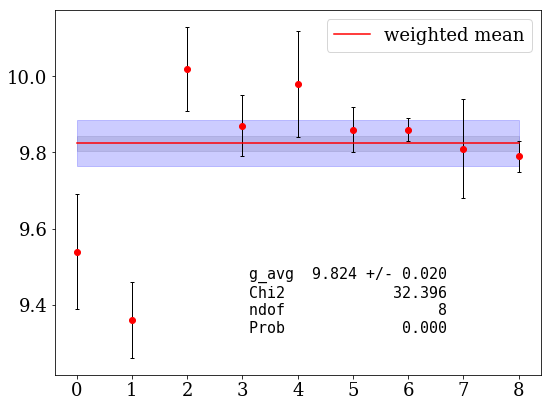

In [233]:
def constant_fit(x, a):
    return a

def chi2_mean_cal(y, ey, sy):
    chi2 = np.sum(((y - ey) / sy)**2)  
    return chi2

Ndof_h = len(g_result) - 1
Chi2_h = chi2_mean_cal(g_result, g_weighted_avg, g_unc)
Prob_chi2_h = stats.chi2.sf(Chi2_h, Ndof_h)  

fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(np.linspace(0,8,9), g_result, g_unc, fmt='ro', ecolor='k', elinewidth=1, capsize=2, capthick=1)
ax.plot(np.linspace(0,8,9), np.repeat(g_weighted_avg,9), '-r', label='weighted mean')
ax.fill_between(np.linspace(0,8,9), np.repeat(g_weighted_avg,9)-g_weighted_unc, np.repeat(g_weighted_avg,9)+g_weighted_unc,
                 color='gray', alpha=0.2)

ax.fill_between(np.linspace(0,8,9), np.repeat(g_weighted_avg,9)-3*g_weighted_unc, np.repeat(g_weighted_avg,9)+3*g_weighted_unc,
                 color='blue', alpha=0.2)

d = {'g_avg': "{:.3f} +/- {:.3f}".format(g_weighted_avg, np.sqrt(1/np.sum(1/g_unc**2))),
     'Chi2':     Chi2_h,
     'ndof':      Ndof_h,
     'Prob':     Prob_chi2_h,
    }
ax.legend()
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.4, 0.3, text, ax, fontsize=15)
fig.tight_layout()

**2.2.3**\
\
Yes! The value $9.8158 \pm 0.001 m/s^2$ is less than one sigma away from my best estimate $9.824 \pm 0.020$ ! So they agree with each other.

# III – Monte Carlo
\
**3.1.1**\
\
First, inspect the PDF. We found that the highest probability is 1.25. Then, we sample with accept and reject, with t = [0, 10] (Since ft(10) = 4.66 * 1e-6, small enough!), and a random number = [0, 1.25].

4.658316465098339e-06


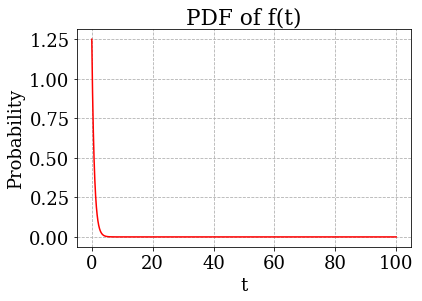

In [262]:
def ft(x):
    return np.exp(-x/0.8)/0.8
plt.plot(np.linspace(0, 100, 10000), ft(np.linspace(0, 100, 10000)), c='r')
plt.grid(linestyle='--')
plt.title('PDF of f(t)')
plt.ylabel('Probability')
plt.xlabel('t')


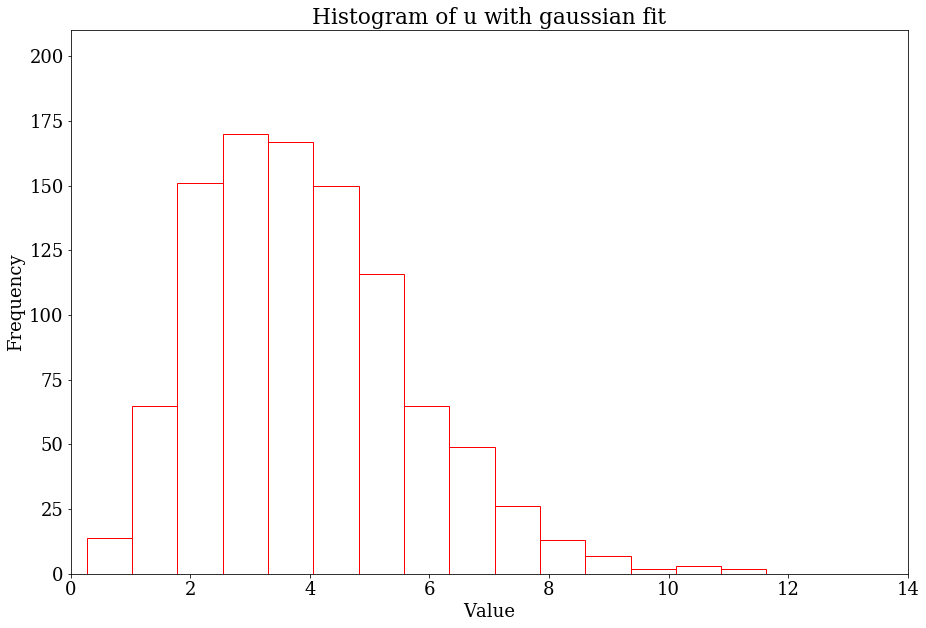

In [504]:
fig_u, ax_u = plt.subplots(figsize=(15,10))
u = np.zeros(1000)
prob_sample=np.zeros(4000)
t_sample=np.zeros(4000)
for i in range(1000):
    count = 0
    while count <= 4:
        t = np.random.random()*1e1
        rand = np.random.random()*1.25
        prob_ft = ft(t)
        if rand < prob_ft:
            count += 1
            u[i]+=t
ax_u.set_title('Histogram of u with gaussian fit')
ax_u.set_xlabel('Value')
ax_u.set_ylabel('Frequency')
ax_u.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')
ax_u.set_xlim(0, 14)
ax_u.set_ylim(0, 210)
u_fre, u_hist = np.histogram(u, 15)
# plt.show()

**3.1.2**\
\
Assume that the bin count is Poisson distributed. The p-value is zero, which makes sense because the plot has a long tail.Therefore, the distribution is not normal distribution

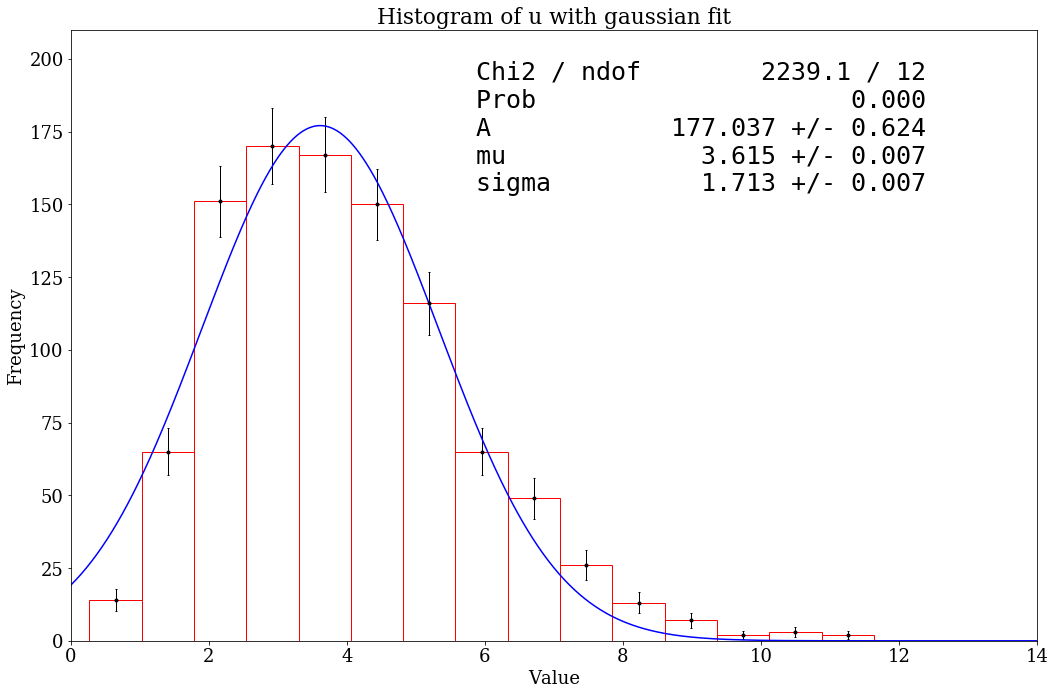

In [505]:
def gaussian_fit(x,n,mu,sigma):
    return n*np.exp(-(x-mu)**2/(2*sigma**2))

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_u_object = Chi2Regression(gaussian_fit, x, y)
u_minuit = Minuit(chi2_u_object, pedantic=False, n=100, mu=4, sigma=1)
u_minuit.migrad()
chi2_u_minuit = u_minuit.fval
N_u_dof = len(u_fre)-3
# fig_uf, ax_uf = plt.subplots(figsize=(15, 8))  # figsize is in inches

# Find the x, y and error on y (sy) given the histogram:
ax_u.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_u_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_u_minuit, N_u_dof),
     'A': [u_minuit.values['n'],u_minuit.errors['n']],
     'mu':[u_minuit.values['mu'],u_minuit.errors['mu']],
     'sigma':[u_minuit.values['sigma'],u_minuit.errors['sigma']]
    }

x_axis = np.linspace(0, 15, 1000)
ax_u.plot(x_axis, gaussian_fit(x_axis, *u_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_u, fontsize=25)
# ax_u.legend(loc='lower left', fontsize=18); # could also be # loc = 'upper right' e.g.
fig_u.tight_layout()
fig_u

**3.1.3**\
\
I will try to fit with Poisson distribution here.

c:\users\gaozheming\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\gaozheming\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


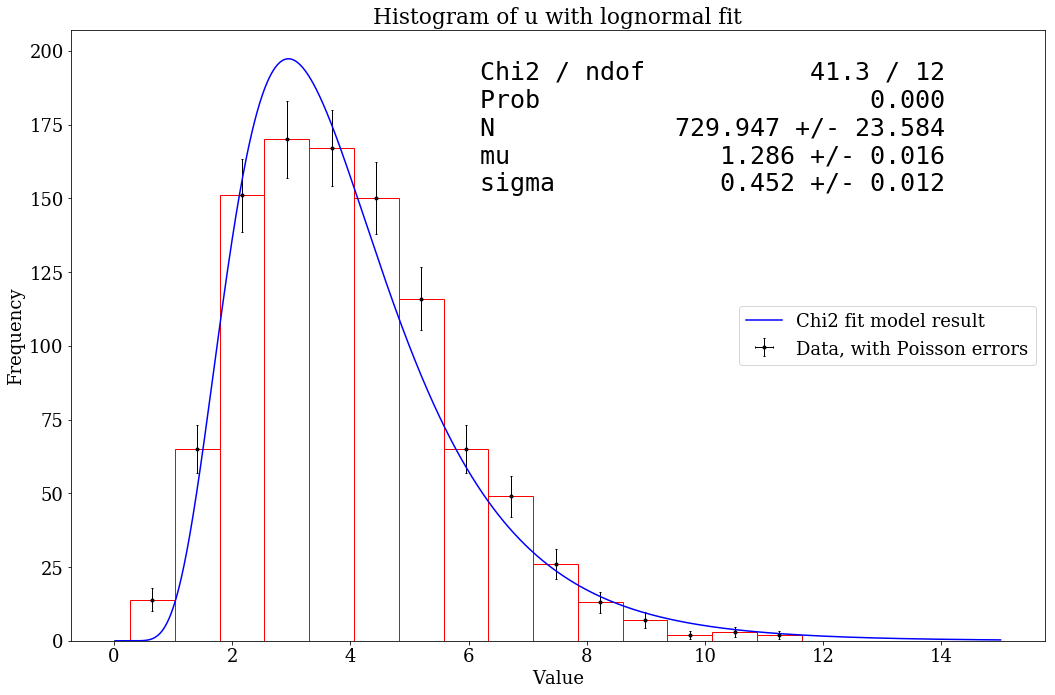

In [553]:
def poisson(x, N, mu, loc):
    return N * stats.poisson.pmf(x, mu, loc)

def log_normal(x, N, mu, sigma):
    return N * np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))

fig_lognor, ax_lognor = plt.subplots(figsize=(15,10))
ax_lognor.set_title('Histogram of u with lognormal fit')
ax_lognor.set_xlabel('Value')
ax_lognor.set_ylabel('Frequency')
ax_lognor.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')
# ax_lognor.set_xlim(0, 14)
# ax_lognor.set_ylim(0, 170)

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_lognor_object = Chi2Regression(log_normal, x, y, sy)
poi_minuit = Minuit(chi2_lognor_object, pedantic=False, N=100, mu=4, sigma=1)
poi_minuit.migrad()
chi2_lognor_minuit = poi_minuit.fval
N_u_dof = len(u_fre)-3
# Find the x, y and error on y (sy) given the histogram:
ax_lognor.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_lognor_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_lognor_minuit, N_u_dof),
     'N': [poi_minuit.values['N'],poi_minuit.errors['N']],
     'mu':[poi_minuit.values['mu'],poi_minuit.errors['mu']],
     'sigma':[poi_minuit.values['sigma'],poi_minuit.errors['sigma']],
    }

x_axis = np.linspace(0, 15, 1000)
ax_lognor.plot(x_axis,log_normal(x_axis, *poi_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_lognor, fontsize=25)
ax_lognor.legend(loc='right', fontsize=18); # could also be # loc = 'upper right' e.g.
fig_lognor.tight_layout()

Seems it works bad, try the skewed normal distribution

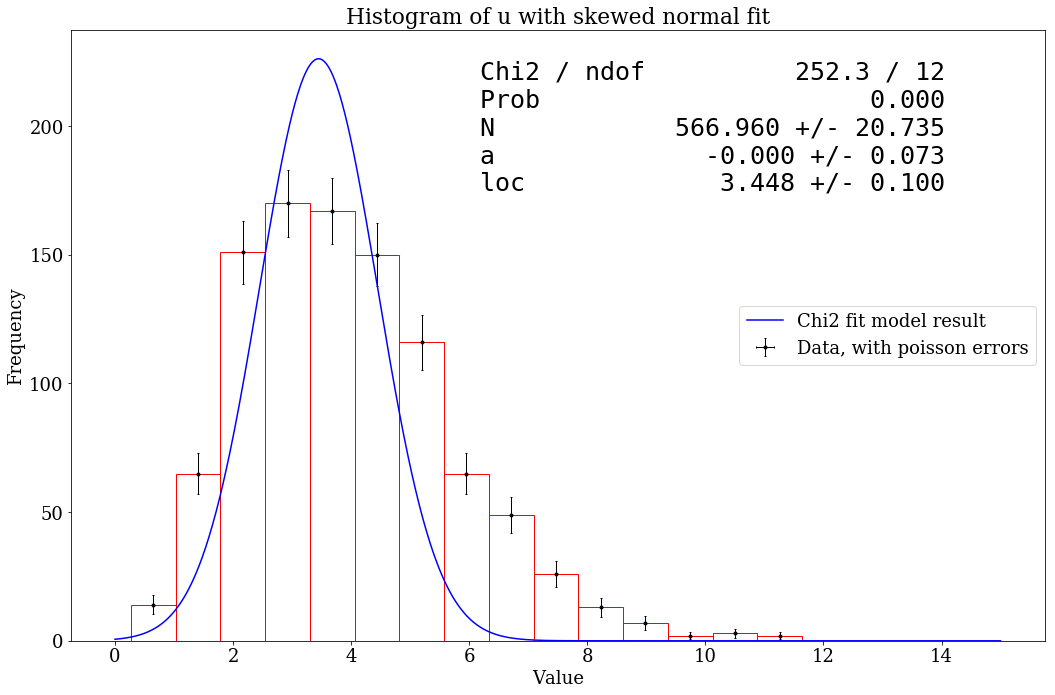

In [522]:
def skewed_normal(x, N, a, loc):
    return N*stats.skewnorm.pdf(x, a, loc)

fig_skewnor, ax_skewnor = plt.subplots(figsize=(15,10))
ax_skewnor.set_title('Histogram of u with skewed normal fit')
ax_skewnor.set_xlabel('Value')
ax_skewnor.set_ylabel('Frequency')
ax_skewnor.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_skewnor_object = Chi2Regression(skewed_normal, x, y, sy)
skew_minuit = Minuit(chi2_skewnor_object, pedantic=False, N=200, a=1, loc=0)
skew_minuit.migrad()
chi2_skewnor_minuit = skew_minuit.fval
N_u_dof = len(u_fre)-3
ax_skewnor.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_skewnor_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_skewnor_minuit, N_u_dof),
     'N': [skew_minuit.values['N'],skew_minuit.errors['N']],
     'a':[skew_minuit.values['a'],skew_minuit.errors['a']],
     'loc':[skew_minuit.values['loc'],skew_minuit.errors['loc']],
    }

x_axis = np.linspace(0, 15, 1000)
ax_skewnor.plot(x_axis,skewed_normal(x_axis, *skew_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_skewnor, fontsize=25)
ax_skewnor.legend(loc='right', fontsize=18); # could also be # loc = 'upper right' e.g.
fig_skewnor.tight_layout()

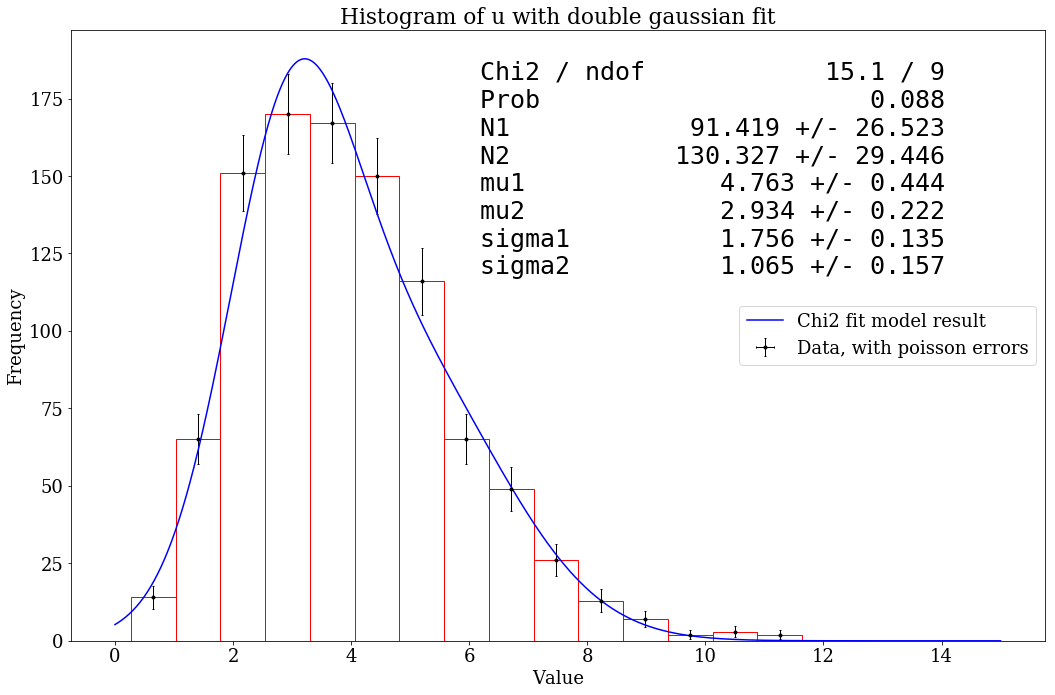

In [554]:
def dual_normal(x, N1, N2, mu1, mu2, sigma1, sigma2):
    return (N1*np.exp(-(x-mu1)**2/(2*sigma1**2))) + (N2*np.exp(-(x-mu2)**2/(2*sigma2**2)))

fig_dualnor, ax_dualnor = plt.subplots(figsize=(15,10))
ax_dualnor.set_title('Histogram of u with double gaussian fit')
ax_dualnor.set_xlabel('Value')
ax_dualnor.set_ylabel('Frequency')
ax_dualnor.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_dualnor_object = Chi2Regression(dual_normal, x, y, sy)
dual_minuit = Minuit(chi2_dualnor_object, pedantic=False, N1=100, N2=10, mu1=3, mu2=6, sigma1=3, sigma2=1)
dual_minuit.migrad()
chi2_dualnor_minuit = dual_minuit.fval
N_u_dof = len(u_fre)-6
ax_dualnor.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_dualnor_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_dualnor_minuit, N_u_dof),
     'N1': [dual_minuit.values['N1'],dual_minuit.errors['N1']],
     'N2': [dual_minuit.values['N2'],dual_minuit.errors['N2']],
     'mu1':[dual_minuit.values['mu1'],dual_minuit.errors['mu1']],
      'mu2':[dual_minuit.values['mu2'],dual_minuit.errors['mu2']],
     'sigma1':[dual_minuit.values['sigma1'],dual_minuit.errors['sigma1']],
     'sigma2':[dual_minuit.values['sigma2'],dual_minuit.errors['sigma2']]
    }

x_axis = np.linspace(0, 15, 1000)
ax_dualnor.plot(x_axis,dual_normal(x_axis, *dual_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_dualnor, fontsize=25)
ax_dualnor.legend(loc='right', fontsize=18); # could also be # loc = 'upper right' e.g.
fig_dualnor.tight_layout()

The double gaussian fit gives a p-value of 0.09, which is rather good!

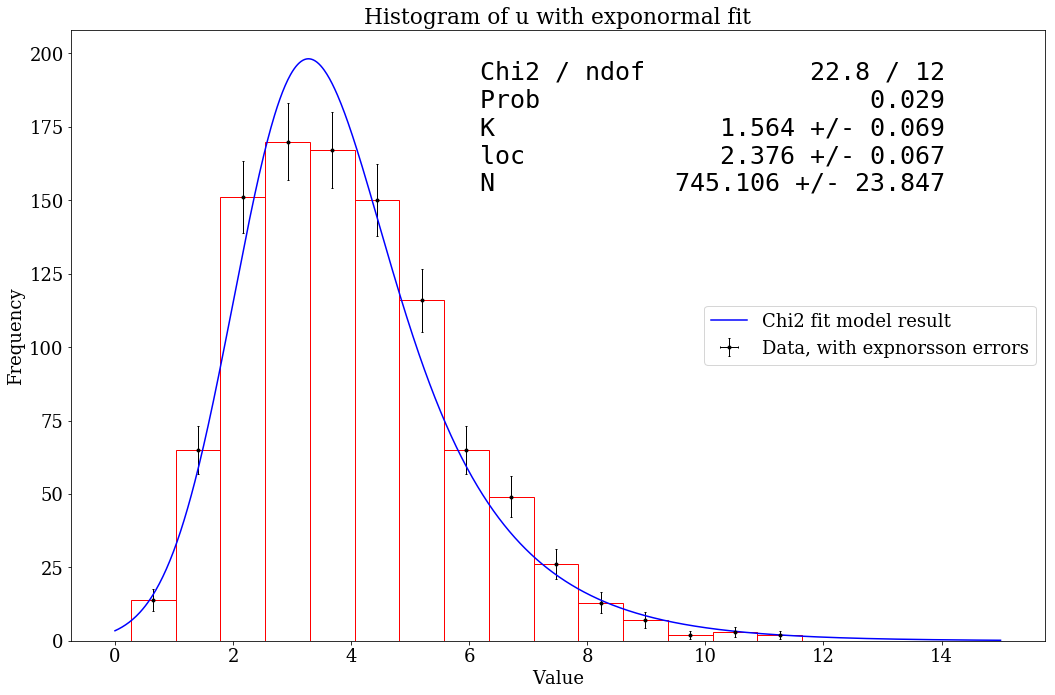

In [552]:
def expo_norm(x, K, loc, N):
    return N*stats.exponnorm.pdf(x, K, loc)

fig_exponor, ax_exponor = plt.subplots(figsize=(15,10))
ax_exponor.set_title('Histogram of u with exponormal fit')
ax_exponor.set_xlabel('Value')
ax_exponor.set_ylabel('Frequency')
ax_exponor.hist(u, 15, histtype='bar', color='r', fill=False, edgecolor='r')
# ax_exponor.set_xlim(0, 14)
# ax_exponor.set_ylim(0, 170)

x = (u_hist[:-1]+u_hist[1:])/2
y = u_fre
sy = np.sqrt(u_fre)
chi2_exponor_object = Chi2Regression(expo_norm, x, y, sy)
expnor_minuit = Minuit(chi2_exponor_object, pedantic=False, K=1, loc=3, N=700)
expnor_minuit.migrad()
chi2_exponor_minuit = expnor_minuit.fval
N_u_dof = len(u_fre)-3
# Find the x, y and error on y (sy) given the histogram:
ax_exponor.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with expnorsson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)


d = {'Chi2 / ndof': '{:.1f} / {:.0f}'.format(chi2_exponor_minuit, N_u_dof),
     'Prob':stats.chi2.sf(chi2_exponor_minuit, N_u_dof),
     'K': [expnor_minuit.values['K'],expnor_minuit.errors['K']],
     'loc':[expnor_minuit.values['loc'],expnor_minuit.errors['loc']],
     'N':[expnor_minuit.values['N'],expnor_minuit.errors['N']],
    }

x_axis = np.linspace(0, 15, 1000)
ax_exponor.plot(x_axis,expo_norm(x_axis, *expnor_minuit.args), '-b', label='Chi2 fit model result') 
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.42, 0.95, text, ax_exponor, fontsize=25)
ax_exponor.legend(loc='right', fontsize=18); # could also be # loc = 'upper right' e.g.
fig_exponor.tight_layout()

After $\chi^2$ fit of the exponential normal distribution, the p-value is 0.03, which also make sense. Therefore, double gaussian fit and exponormal fit might be options.

**3.2.1**\
\
The F(x) of PDF is $-Ce^{-x}(x+1)$. Since $-e^{-x}(x+1)|^{\infty}_{0}$ is already nomalized, C can be 1.Take a look at the PDF distribution, the largest value of f(x) is no higher than 0.4.

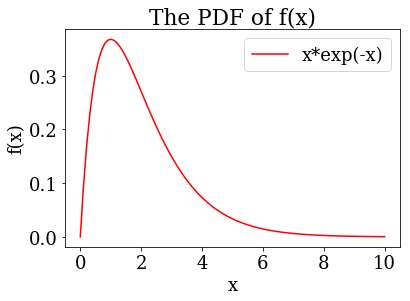

The value of x=20 is 0.00000459 


In [564]:
def pdf32(x):
    return x * np.exp(-x)

x = np.linspace(0, 10, 100)
y = pdf32(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('The PDF of f(x)')
plt.plot(x, y, label=('x*exp(-x)'), c='r')
plt.legend()
plt.show()
print('The value of x=20 is %2.8f '%pdf32(15))

Therefore, the upper boundary can be set to 20. Next, generate random numbers with accept and reject method.

In [583]:
for Nexp in range(10):
    m = np.zeros(1000)-1
    for i in range(1000):
        while m[i]==-1:
            x_sample = np.random.random()*20
            y_sample = np.random.random()*0.4
            if pdf32(x_sample)>y_sample:
                m[i] = x_sample
    print('No', Nexp, '\'s experiment x median value is %2.5f'%np.median(m))

No 0 's experiment x median value is 1.74566
No 1 's experiment x median value is 1.73389
No 2 's experiment x median value is 1.70978
No 3 's experiment x median value is 1.65218
No 4 's experiment x median value is 1.67811
No 5 's experiment x median value is 1.65756
No 6 's experiment x median value is 1.77735
No 7 's experiment x median value is 1.68187
No 8 's experiment x median value is 1.68464
No 9 's experiment x median value is 1.67723


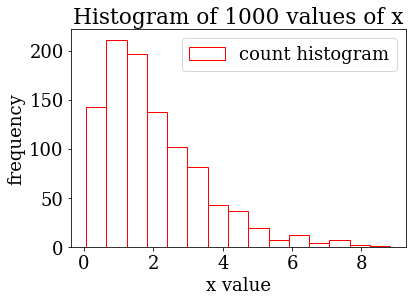

In [584]:
plt.title('Histogram of 1000 values of x')
plt.hist(m,15, histtype='bar', fill=False, edgecolor='r', label='count histogram')
plt.xlabel('x value')
plt.ylabel('frequency')
plt.legend()
plt.show()